In [2]:
import matplotlib.pyplot as plt
import numpy as np

import WD_models

# Example 1: converting H--R diagram coordinate into WD parameters

In [3]:
model = WD_models.load_model(low_mass_model='Fontaine2001',
                             normal_mass_model='Althaus2010_001',
                             high_mass_model='ONe',
                             spec_type='DA_thick',
                             )
                             
# the cooling age at (BP-RP, G) = (0.25, 13) and (0.25, 14)
age_cool = model['HR_to_age_cool']([0.25, 0.25], [13,14])

print(age_cool)

/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in greater
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])
/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in less
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])


[ 1.27785237  2.70106702]


In [4]:
model = WD_models.load_model('f', 'a001', 'o', 'DA_thick',
                             HR_bands=('u-g', 'G'),
                             )

/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in greater
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])
/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in less
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])


In [5]:
model_A = WD_models.load_model('', 'b', 'b', 'DA_thick')
model_B = WD_models.load_model('', 'b', 'b', 'DB')

d_age_cool = (model_A['HR_to_age_cool'](0, 13) - model_B['HR_to_age_cool'](0, 13))

print(d_age_cool)

/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in greater
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])
/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in less
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])


0.269691616685


# Example 2: plotting contours on the H--R diagram

/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in greater
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])
/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in less
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])
/Users/scheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/Users/scheng/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


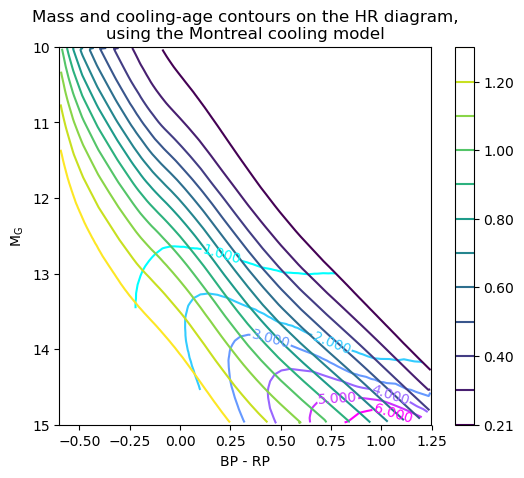

In [6]:
HR_grid = (-0.6, 1.25, 0.002, 10, 15, 0.01)
model  = WD_models.load_model('f', 'f', 'f', 'DA_thick', HR_grid=HR_grid) 

# get rid of some artifects of interpolation
grid_x, grid_y = np.mgrid[HR_grid[0]:HR_grid[1]:HR_grid[2], HR_grid[3]:HR_grid[4]:HR_grid[5]]
model['grid_HR_to_age_cool'][model['HR_to_mass'](grid_x, grid_y) < 0.21] = np.nan

plt.figure(figsize=(6,5),dpi=100)

# plot cooling age contours
CS = plt.contour(model['grid_HR_to_age_cool'].T,
                 levels=[1,2,3,4,5,6], 
                 extent=(HR_grid[0],HR_grid[1],HR_grid[3],HR_grid[4]),
                 aspect='auto', origin='lower', cmap='cool',
                )
plt.clabel(CS, inline=True, use_clabeltext=True)

# plot mass contours
plt.contour(model['grid_HR_to_mass'].T,
            levels=[0.21,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.29], 
            extent=(HR_grid[0],HR_grid[1],HR_grid[3],HR_grid[4]),
            aspect='auto', origin='lower',
           )
plt.colorbar()

plt.title('Mass and cooling-age contours on the HR diagram,\nusing the Montreal cooling model')
plt.gca().invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('$\\rm M_G$')
plt.show()

# Example 3: plotting cooling tracks on H--R diagram

/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in greater
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])
/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in less
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])


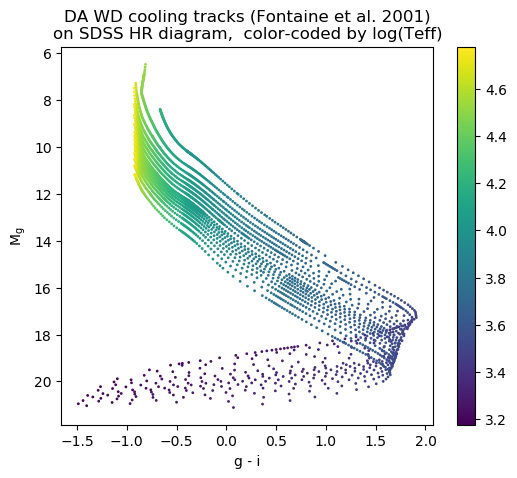

In [7]:
logteff_logg_grid = (3.0, 5.1, 0.01, 6.5, 9.6, 0.01)

model = WD_models.load_model('f', 'f', 'f', 'DA_thick', 
                             HR_bands=('g-i','g'), 
                             logteff_logg_grid=logteff_logg_grid)

plt.figure(figsize=(6,5),dpi=100)
plt.scatter(model['color'], model['Mag'], c=model['logteff'], s=1)
plt.colorbar()

plt.title('DA WD cooling tracks (Fontaine et al. 2001)\non SDSS HR diagram,  color-coded by log(Teff)')
plt.xlabel('g - i')
plt.ylabel('$\\rm M_g$')
plt.gca().invert_yaxis()
plt.show()

# Example 4: the effect of phase separation

/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in greater
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])
/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in less
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])
/Users/scheng/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


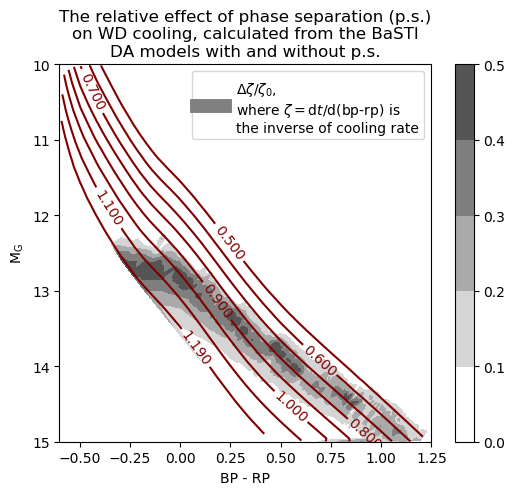

In [8]:
# load the BaSTI models with and without phase separation
HR_grid = (-0.6, 1.25, 0.002, 10, 15, 0.01)
model_1 = WD_models.load_model('f', 'b', 'b', 'DA_thick', HR_grid=HR_grid) 
model_2 = WD_models.load_model('f', 'bn', 'bn', 'DA_thick', HR_grid=HR_grid)

plt.figure(figsize=(6,5),dpi=100)

# plot the mass contour
CS = plt.contour(model_1['grid_HR_to_mass'].T,
                 levels=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.19], 
                 extent=(HR_grid[0],HR_grid[1],HR_grid[3],HR_grid[4]),
                 aspect='auto', origin='lower', cmap='jet', vmin=-1000)
plt.clabel(CS, inline=True, use_clabeltext=True)

# plot the slowing-down effect of phase separation
contrast = ((model_1['grid_HR_to_cool_rate^-1'] - model_2['grid_HR_to_cool_rate^-1']) /
            (model_2['grid_HR_to_cool_rate^-1'])).T
plt.contourf(contrast, 
             levels=[0.00, 0.10, 0.20, 0.30, 0.40, 0.50],
             extent=(HR_grid[0],HR_grid[1],HR_grid[3],HR_grid[4]),
             aspect='auto', origin='lower', cmap='binary', vmin=0.05, vmax=0.65)
plt.colorbar()

# plot the legend
plt.plot([0,0],[1,1],'-', color='gray', lw=10, 
         label='$\\Delta\\zeta/\\zeta_0$,\n' +
                'where $\\zeta=$d$t$/d(bp-rp) is\n' + 
                'the inverse of cooling rate')
plt.legend()

# set the figure
plt.title('The relative effect of phase separation (p.s.)\n' +
          'on WD cooling, calculated from the BaSTI\n' + 
          'DA models with and without p.s.')
plt.xlabel('BP - RP')
plt.ylabel('$\\rm M_G$')
plt.xlim(-0.6,1.25)
plt.ylim(15,10)
plt.show()

# Example 5: transformation between any desired WD parameters

In [9]:
model = WD_models.load_model('f', 'a001', 'o', 'DA_thick')

m_logteff_to_agecool = WD_models.interp_xy_z_func(x=model['mass_array'],
                                                  y=model['logteff'],
                                                  z=model['age_cool'],
                                                  interp_type='linear',
                                                  )
# the cooling age for (m_WD, Teff) = (1.1 Msun, 10000 K)
age_cool = m_logteff_to_agecool(1.1, np.log10(10000))

print(age_cool)

/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in greater
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])
/Users/scheng/Gaia/WD_models.py:573: RuntimeWarning: invalid value encountered in less
  (bp_rp > HR_grid[0]) * (bp_rp < HR_grid[1])


2.1917495897185257
